<h1>Abstract</h1> 

Monte Carlo methods employ random sampling to get numerical results. Here, I discuss the application of Monte Carlo to numerical integration and numerical solution of ODEs using simple examples. We also approximate certain constants using Monte Carlo methods. The convergence of the numerical results are just dependent on the sample size, which is suited better for integrals of mulivalued functions and partial differential equations.

In [2]:
import numpy as np
from random import uniform 
import matplotlib.pyplot as plt
%matplotlib inline

<h1>I. Numerical Integration</h1>

To get the average of a function, $<f(x)>$ over an interval $[a,b]$, we integrate $f(x)P(x)$ over $[a,b]$,<br/> where P(x) is the probability distribution function, $P(x) = \frac{1}{b-a}$:

$<f(x)> = \frac{1}{b-a}\int_{a}^{b}f(x)dx.$

So we can define the integral of $f(x)$ over the interval $[a,b]$ in terms of it's average $<f(x)>$:

$\int_{a}^{b}f(x)dx = (b-a)<f(x)>.$

In evaluating the average $<f(x)>$ over the interval $[a,b]$, we can use random sampling to approximate it:

$<f(x)> \sim \frac{1}{K}\sum_{i=1}^{K}f(x_{i})$, where $x_{i}$ is a randomly chosen number within the interval $[a,b]$ and $K$ is the number of samples. <br/><br/>
Basically, we randomly choose $K$ numbers within the interval $[a,b]$ and evulate the function with those numbers,<br/> then take the average to approximate the average of $f(x)$ over the interval $[a,b]$ to approximate the integral:

$\int_{a}^{b}f(x)dx \sim (b-a)\frac{1}{K}\sum_{i=1}^{K}f(x_{i})$

To get a better approximation of the 
integral, we can divide the interval $[a,b]$ into subintervals (smaller intervals) and consider more samples. <br/>
Thus, the convergence is just a matter of sample size which makes Monte Carlo more useful for integrals 
of multivalued functions and partial differential equations. As an example, we numerically solve for 
$\int_{0}^{\pi}x^{2}\cos(x)dx$. (The answer is $-2\pi$)



In [7]:
a = 0
b = np.pi
n = 100 #number of subintervals of the interval [a,b]
N = 100 #number of samples 
x = np.zeros(n+1) #list of x values
h = (b-a)/n #step size

f = lambda x: (x**2)*np.cos(x) #integrand

total = 0
for i in range(n):
    x[i+1] = x[i] + h
    f_mean = 0 #initialization
    for k in range(N): 
        x_k = uniform(x[i],x[i+1]) #random number within the subinterval
        f_mean = f(x_k) + f_mean 
    sub_area = (h/N)*f_mean #average for the subinterval
    total = sub_area + total #average for the interval
print(total)    

-6.28371739245989


If we compute for the approximate integral 500 times, the average would tend to the real value, $-2\pi$  

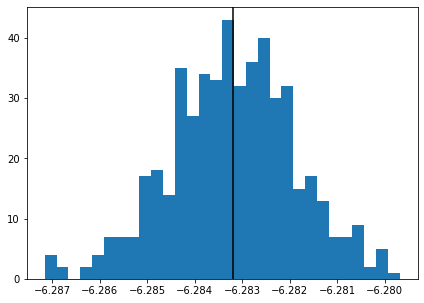

In [4]:
K = 500
intrl = np.zeros(K)
for j in range(len(intrl)):    
    total = 0
    for i in range(n):
        x[i+1] = x[i] + h
        f_mean = 0 #initialization
        for k in range(N):
            x_k = uniform(x[i],x[i+1]) #random number within the subinterval
            f_mean = f(x_k) + f_mean 
        sub_area = (h/N)*f_mean
        total = sub_area + total
    intrl[j] = total
plt.figure(figsize = (7,5))
plt.hist(intrl, bins = 30)
plt.axvline(x=-2*np.pi,color = 'black')

<h1>II Numerical ODE</h1> 

The solution of 

$\frac{dy}{dx} = f(x)$

is just

$y_{i+1} = y_{i} + \int_{x_{i}}^{x_{i+1}}f(x)dx$, where $y_{i} = f(x_{i})$ and $y_{i+1} = f(x_{i+1})$ 

The integral can be approximated using random sampling as shown in the previous section:

$y_{i+1} \sim y_{i} + \frac{x_{i+1}-x_{i}}{K}\sum_{i=1}^{K}f(x_{k})$, where $x_{k}$ is randomly chosen between $x_{i}$ and $x_{i+1}.$

As an example, we consider the initial value problem:

$\frac{dy}{dx} = e^{x}$, $y_{0} = y(0)$ 

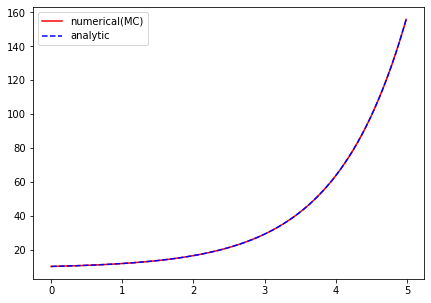

In [5]:
K = 100 #number of samples  
n = 500 #number of points
h = 0.01 #step size
y = np.zeros(n) 
x = np.zeros(n)
x_0 = 0 
y_0 = 10

f = np.exp  #f(x): dy/dx = f(x)
f_a = lambda x: y_0 + np.exp(x) -1 #analytic solution of the ODE

x[0] = x_0
y[0] = y_0

for i in range(n-1):
    x[i+1] = x[i] + h
    f_mean = 0
    for k in range(K):
        x_k = uniform(x[i],x[i+1])
        f_mean = f(x_k) + f_mean
    y[i+1] = y[i] + (h/K)*f_mean
    
plt.figure(figsize = (7,5))
plt.plot(x,y,color = 'red', label = 'numerical(MC)')    
plt.plot(x,f_a(x),linestyle = 'dashed',color = 'blue', label = 'analytic')
plt.legend(loc = 'best')

<h1>III Approximating Constants Using Monte Carlo Methods</h1>

We now understand the basics of the Monte Carlo method. Let's use it to solve for constants! 

A.) $e$ (base of the natural logarithm) <br/>
B.) $\gamma$ (Euler-Mascheroni Constant) <br/>
C.) $\pi$ <br/>
<br/>
<strong>A.</strong> We see the number $e$ in compounding interest and radioactive decay. In Gnedenko's Theory of Probability, we see another way of thinking about $e$. In an exercise problem, the reader can demonstrate that the number $e$ is also the average minimum number of terms randomly chosen between 0 and 1 whose sum is greater than 1.  

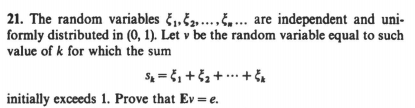

In [91]:
N = 1000000
steps_list = []

for i in range(N):
    
    steps = 0
    sumU_k = 0
    
    while sumU_k <= 1: #keeps on adding random numbers while the sum does not exceed 1 
        
        U_k = uniform(0,1)
        sumU_k = U_k + sumU_k 
        steps = steps + 1   
        
    else:
        steps_list.append(steps)
            
print("approximation of e for N = %d: %f"%(N,np.mean(steps_list)))
print("percent error: %f%%" %(np.absolute(np.mean(steps_list)-np.exp(1))/np.exp(1)*100))
print("standard deviation: %f" %np.std(steps_list))

approximation of e for N = 1000000: 2.718682
percent error: 0.014721%
standard deviation: 0.875070


The percent error is just a way of expressing how close our approximation is to the actual value. 

$ percent\: error = \big|\frac{experimental\: value \:-\: theoretical\: value}{theoretical \: value}\big|$

We should be happy when the percent error is very close to 0. <br/><br/>

<strong>B.</strong> The Euler-Mascheroni constant can be expressed by the following integral:

$\gamma = -\int_{0}^{1}\ln\big(\ln\big(\frac{1}{x}\big)\big) = -\Gamma'(1)$

,where $\Gamma'(1)$ is the derivative of the Gamma Function evaluated at 1

In [7]:
a = 0
b = 1
n = 1000 #number of subintervals of the interval [a,b]
N = 1000 #number of samples 
x = np.zeros(n+1) #list of x values
h = (b-a)/n #step size

f = lambda x: np.log(np.log(1/x)) #integrand

total = 0

for i in range(n):
    x[i+1] = x[i] + h
    f_mean = 0 #initialization
    for k in range(N): 
        x_k = uniform(x[i],x[i+1]) #random number within the subinterval
        f_mean = f(x_k) + f_mean 
    sub_area = (h/N)*f_mean #average for the subinterval
    total = sub_area + total #average for the interval
    
print("approximation of gamma for sample size %d and number of subintervals %d: %f"%(N,n,-1*total))
print("percent error: %f%%" %(np.absolute(-1*total-np.euler_gamma)/np.euler_gamma*100))


approximation of gamma for sample size 1000 and number of subintervals 1000: 0.577225
percent error: 0.001630%


<strong>C.</strong> Here is a very common example. Which is why we included it last. Consider a quarter-circle inscribed within a square of side 1. The circle also has radius 1. $\frac{\pi}{4}$ is just the ratio of the area of the quarter-circle to the area of the square. Now, to approximate the area of the square and the quarter-circle, we just count the number of points we randomly choose that would land on the quarter-circle and its exterior.

In [6]:
N = 100000
x = np.random.uniform(low = 0, high = 1, size = N)
y = np.random.uniform(low = 0, high = 1, size = N)
K = 0
K_ = 0

for i in range(N):
    distance = np.sqrt(x[i]**2 + y[i]**2)
    if distance <= 1:
        K_ +=  1 #count the points that would land within the quarter circle (including its edge)
    else:
        K += 1 #count the points that would land outside the quarter circle 

print("approximation of pi for sample size %d: %f"%(N,4*K_/(K+K_)))
print("percent error: %f%%" %(np.absolute(np.pi - 4*K_/(K+K_))/np.pi*100))


approximation of pi for sample size 100000: 3.144360
percent error: 0.088087%


<h1>Conclusion</h1>

Monte Carlo methods are very simple to implement and the convergence to the actual value is only dependent on the number of samples which is not a problem for today because we have faster computers compared to when these
methods were initially developed. Monte Carlo methods can be used in a variety of ways. It's applicability is 
seemingly endless as long as we can think of problems we can solve using random sampling.